# Le seguenti celle fanno il calcolo della distanza di una coordinata sul file SPT-CL_J2344-4243_band3_combined.dat.im.image.fits

La prima cella fa un import dei package necessari. La seconda definisce una funzione con tutte le eccezioni del caso e restituisce 3 distanze: [distanza in pixel, distanza in gradi, distanza in radianti]. 

Gli argomenti della funzione sono: il file fits su cui basarsi, le coordinate x e y dei due punti (per il secondo punto ci sono dei valori di default che sono quelli del reference point nell'header del file) di cui calcolare la distanza, l'unità di misura con cui sono espresse queste coordinate. Quest'ultima può essere in pixel ('pixel'), gradi sessagesimali ('angle_deg') o radianti ('angle_rad').

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
fil='SPT-CL_J2344-4243_band3_combined.dat.im.image.fits'

In [2]:
sci=fits.open(fil)[0]
hdr=sci.header
dat=sci.data
len_1=hdr['NAXIS1']
len_2=hdr['NAXIS2']
delt_1=hdr['CDELT1']
delt_2=hdr['CDELT2']
crval_1=hdr['CRVAL1']
crval_2=hdr['CRVAL2']
crpix_1=hdr['CRPIX1']
crpix_2=hdr['CRPIX2']
array_fil=[len_1, len_2, delt_1, delt_2, crval_1, crval_2, crpix_1, crpix_2]

def distance_calc(ak, x_1 , y_1 , x_0, y_0 , scale='pixel'):
    if scale in ['pixel' , 'angle_rad' , 'angle_deg']:
        if scale=='pixel':
            if x_1 in np.arange (0, ak[0]) and y_1 in np.arange (0, ak[1]):
                if x_0 in np.arange (0, ak[0]) and y_0 in np.arange (0, ak[1]):
                    dist_x = x_1 - x_0
                    dist_y = y_1 - y_0
                    dist_pix = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_deg = np.sqrt((ak[2]*dist_x)**2 + (ak[3]*dist_y)**2)
                    dist_rad = dist_deg*np.pi/180.0
                    dist = [dist_pix , dist_deg , dist_rad]
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                print(x_1 , y_1)
                dist=[np.nan , np.nan , np.nan]
        elif scale=='angle_deg':                
            if x_1 in np.arange (ak[4] - ak[6]*ak[2] , ak[4] + (ak[0] - ak[6])*ak[2]) and y_1 in np.arange (ak[5] - ak[7]*ak[3] , ak[5] + (ak[1] - ak[7])*ak[3]):                
                if x_0 in np.arange (ak[4] - ak[6]*ak[2] , ak[4] + (ak[0] - ak[6])*ak[2]) and y_0 in np.arange (ak[5] - ak[7]*ak[3] , ak[5] + (ak[1] - ak[7])*ak[3]):
                    dist_x = x_1 - x_0
                    dist_y = y_1 - y_0
                    dist_deg = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_pix = np.sqrt((dist_x/ak[2])**2 + (dist_y/ak[3])**2)
                    dist_rad = dist_deg*np.pi/180.0
                    dist = [dist_pix , dist_deg , dist_rad]
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                dist=[np.nan , np.nan , np.nan]     
        elif scale=='angle_rad':
  
            if x_1 in np.arange ((ak[4] - ak[6]*ak[2])*np.pi/180.0 , (ak[4] + (ak[0] - ak[6])*ak[2])*np.pi/180.0) and y_1 in np.arange ((ak[5] - ak[7]*ak[3])*np.pi/180.0 , (ak[5] + (ak[1] - ak[7])*ak[3])*np.pi/180.0):                
                if x_0 in np.arange ((ak[4] - ak[6]*ak[2])*np.pi/180.0 , (ak[4] + (ak[0] - ak[6])*ak[2])*np.pi/180.0) and y_0 in np.arange ((ak[5] - ak[7]*ak[3])*np.pi/180.0 , (ak[5] + (ak[1] - ak[7])*ak[3])*np.pi/180.0):               
                    dist_x = x_1 - x_0
                    dist_y = y_1 - y_0
                    dist_rad = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_pix = np.sqrt((dist_x/ak[2])**2 + (dist_y/ak[3])**2)*180.0/np.pi
                    dist_deg = dist_rad*180.0/np.pi
                    dist = [dist_pix , dist_deg , dist_rad]    
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                dist=[np.nan , np.nan , np.nan]   
                    
                    
                    
                
               
    else:
        print('Can not work with those units. ')
        print('**'*20)
        print('Scale can be "pixel" (default), "angle_deg" or "angle_rad". ')
        dist=[np.nan, np.nan, np.nan]
    
    return dist

La cella seguente chiama la function facendole calcolare una distanza fra la coordinata (1000.0, 1000.0) e la coordinata di reference espressa nell'header del file

In [3]:
distance_calc(array_fil , 1000.0 , 1000.0 , 200 , 200 , 'pixel')

[1131.370849898476, 0.047140452079106936, 0.0008227560996590225]

In [4]:

files=fits.open(fil)[0].data
sci1=fits.open(fil)[0]
pixels=np.array(np.where(files==files[:]))
length=len(list(pixels[0]))
data_row=[]


angle_degs0=[]
angle_rads0=[]
angle_degs1=[]
angle_rads1=[]

for i in range (0, length ):
    data_row.append(files[pixels[0][i]][pixels[1][i]])
    angle_degs0.append(float((pixels[0][i] - sci1.header['CRPIX1']))*float(sci1.header['CDELT1']))
    
    angle_degs1.append(float((pixels[1][i] - sci1.header['CRPIX2']))*float(sci1.header['CDELT2']))
    angle_rads0.append(float((pixels[0][i] - sci1.header['CRPIX1']))*float(sci1.header['CDELT1'])*np.pi/180.0)
    angle_rads1.append(float((pixels[1][i] - sci1.header['CRPIX2']))*float(sci1.header['CDELT2'])*np.pi/180.0)
data_row =np.array(data_row)
angle_degs0=np.array(angle_degs0)
angle_degs1=np.array(angle_degs1)
angle_rads0=np.array(angle_rads0)
angle_rads1=np.array(angle_rads1)

dati_arr0=np.vstack([pixels, angle_degs0 , angle_degs1 , angle_rads0 , angle_rads1 , data_row])

In [5]:
print(dati_arr0)
print(dati_arr0.shape)
print(dati_arr0[6][0])

[[ 5.10000000e+02  5.10000000e+02  5.10000000e+02 ...  1.53800000e+03
   1.53800000e+03  1.53800000e+03]
 [ 1.00200000e+03  1.00300000e+03  1.00400000e+03 ...  1.04100000e+03
   1.04200000e+03  1.04300000e+03]
 [ 2.14583333e-02  2.14583333e-02  2.14583333e-02 ... -2.13750000e-02
  -2.13750000e-02 -2.13750000e-02]
 ...
 [ 3.74518569e-04  3.74518569e-04  3.74518569e-04 ... -3.73064128e-04
  -3.73064128e-04 -3.73064128e-04]
 [-1.67260720e-05 -1.59988515e-05 -1.52716310e-05 ...  1.16355283e-05
   1.23627489e-05  1.30899694e-05]
 [ 9.25668428e-06  7.31922910e-06  5.41111467e-06 ...  1.84322780e-05
   1.76167141e-05  1.63296900e-05]]
(7, 803859)
9.256684279534966e-06


La cella seguente definisce una funzione che crea un array con valori di distanza (calcolati umplementando la funzione precedentemente definita) per ogni pixel di un file fits, con tutte le eccezioni del caso. In particolare è ancora un po' ridondante il modo in cui è definita questa funzione rispetto alla precedente (distance_calc)

I vari print() servono semplicemente a tenere traccia del lavoro svolto dalla funzione, e sono usati per controllare che tutto funzioni correttamente.


2048


In [43]:

def r_finder_new(array_dati , akk ,centre_1='centre_1',centre_2='centre_2',scale='pixel'):
    
    coord_pix=[]
    arr0_list=list(array_dati[0])
    l=len(arr0_list)
    
    if scale in ['pixel' , 'angle_deg' , 'angle_rad']:
        
        if scale=='pixel':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[akk[6] , akk[7]] 
            else:
                centre_coord=[centre_1 , centre_2]
            if centre_coord[0] in np.arange (0 , akk[0]) and centre_coord[1] in np.arange (0, akk[1]):
                for i in range (0, l):
                    coord_pix.append(distance_calc(akk, array_dati[0][i] , array_dati[1][i] , centre_coord[0] , centre_coord[1] , scale))
                    
            else:
                coord_pix=np.zeros_like(array_dati[0])
                coord_pix[:]=np.nan
        elif scale=='angle_deg':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[akk[4] , akk[5]]
            else:
                centre_coord=[centre_1 , centre_2]
            if centre_coord[0] in np.arange (akk[4] - akk[6]*akk[2] , akk[4] + (akk[0] - akk[6])*akk[2]) and centre_coord[1] in np.arange (akk[5] - akk[7]*akk[3] , akk[5] + (akk[1] - akk[7])*akk[3]):     
                for i in range (0, l):
                    coord_pix.append(distance_calc(akk, array_dati[2][:] , array_dati[3][:] , centre_coord[0] , centre_coord[1] , scale)[0])
            else:
                coord_pix=np.zeros_like(array_dati[0])
                coord_pix[:]=np.nan
                
        elif scale=='angle_rad':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[akk[4]*np.pi/180.0 , akk[5]*np.pi/180.0]
            else:
                centre_coord=[centre_1 , centre_2]
            if centre_coord[0] in np.arange ((akk[4] - akk[6]*akk[2])*np.pi/180.0 , (akk[4] + (akk[0] - akk[6])*akk[2])*np.pi/180.0) and centre_coord[1] in np.arange ((akk[5] - akk[7]*akk[3])*np.pi/180.0 , (akk[5] + (akk[1] - akk[7])*akk[3])*np.pi/180.0):
                   for i in range (0, l ): 
                    coord_pix.append(distance_calc(akk, array_dati[4][:] , array_dati[5][:] , centre_coord[0] , centre_coord[1] , scale)[0])
            else:
                coord_pix=np.zeros_like(array_dati[0])
                coord_pix[:]=np.nan
    
    else:
            coord_pix=np.zeros_like(array_dati[0])
            coord_pix[:]=np.nan
    return coord_pix

r_new=r_finder_new(dati_arr0, array_fil)               
r_new=np.transpose(np.array(r_new))
print(r_new)
print(r_new.shape)
print(dati_arr0)

[[5.15513336e+02 5.15469689e+02 5.15427978e+02 ... 5.13249452e+02
  5.13281599e+02 5.13315692e+02]
 [2.14797223e-02 2.14779037e-02 2.14761657e-02 ... 2.13853938e-02
  2.13867333e-02 2.13881538e-02]
 [3.74891877e-04 3.74860136e-04 3.74829803e-04 ... 3.73245534e-04
  3.73268912e-04 3.73293706e-04]]
(3, 803859)
[[ 5.10000000e+02  5.10000000e+02  5.10000000e+02 ...  1.53800000e+03
   1.53800000e+03  1.53800000e+03]
 [ 1.00200000e+03  1.00300000e+03  1.00400000e+03 ...  1.04100000e+03
   1.04200000e+03  1.04300000e+03]
 [ 2.14583333e-02  2.14583333e-02  2.14583333e-02 ... -2.13750000e-02
  -2.13750000e-02 -2.13750000e-02]
 ...
 [ 3.74518569e-04  3.74518569e-04  3.74518569e-04 ... -3.73064128e-04
  -3.73064128e-04 -3.73064128e-04]
 [-1.67260720e-05 -1.59988515e-05 -1.52716310e-05 ...  1.16355283e-05
   1.23627489e-05  1.30899694e-05]
 [ 9.25668428e-06  7.31922910e-06  5.41111467e-06 ...  1.84322780e-05
   1.76167141e-05  1.63296900e-05]]


In [8]:


dati_arr1=np.vstack([dati_arr0, r_new])
print(dati_arr1.shape)

(10, 803859)


In [9]:
print(dati_arr1)

[[ 5.10000000e+02  5.10000000e+02  5.10000000e+02 ...  1.53800000e+03
   1.53800000e+03  1.53800000e+03]
 [ 1.00200000e+03  1.00300000e+03  1.00400000e+03 ...  1.04100000e+03
   1.04200000e+03  1.04300000e+03]
 [ 2.14583333e-02  2.14583333e-02  2.14583333e-02 ... -2.13750000e-02
  -2.13750000e-02 -2.13750000e-02]
 ...
 [ 5.15513336e+02  5.15469689e+02  5.15427978e+02 ...  5.13249452e+02
   5.13281599e+02  5.13315692e+02]
 [ 2.14797223e-02  2.14779037e-02  2.14761657e-02 ...  2.13853938e-02
   2.13867333e-02  2.13881538e-02]
 [ 3.74891877e-04  3.74860136e-04  3.74829803e-04 ...  3.73245534e-04
   3.73268912e-04  3.73293706e-04]]


# La cella che segue fa una stima del segnale di fondo dal file SPT-CL_J2344-4243_band3_combined.jac.im.image.fits e della sua varianza.

In particolare viene fatto un plot per verificare la gaussianità del rumore. Successivamente il segnale di fondo viene sottratto ad ogni pixel nel file dei dati, e l'errore si può quindi scrivere come:

$\sqrt{(\sigma_{noise}^{2} + \frac{\sigma_{noise}^{2}}{N})}$

dove il secondo termine è dovuto al fatto che ai dati sottraiamo un segnale di fondo stimato su $n$ pixel del file relativo al solo rumore. Siccome $n \approx 8 \cdot 10^{5}$ questo termine risulta trascurabile rispetto al primo.

Il rumore è mediato su  803859.0  valori.


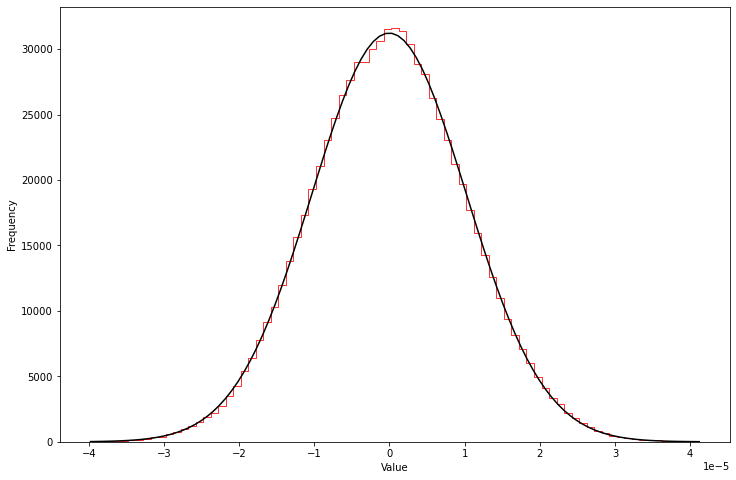

In [10]:
sci_noise=fits.open('SPT-CL_J2344-4243_band3_combined.jac.im.image.fits')[0]

def setup_plot(figsize, xlabel, ylabel):
    """ @brief Initialize basic plot parameters
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
    """

    plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

noise=sci_noise.data
noise_m=np.nanmean(noise)
noise_var=np.nanvar(noise)
noise_min=np.nanmin(noise)
noise_max=np.nanmax(noise)
noise_size=0.0
for i in range (0, 2048):
    for j in range(0, 2048):
        if not np.isnan(noise[i][j]):
            noise_size += 1.0
print("Il rumore è mediato su " , noise_size , " valori.")

bins = np.arange(noise_min, noise_max, 0.000001)
x = np.linspace(noise_min, noise_max, 100)
def f(x , a , b , c):
    noise_gauss = 1./(np.sqrt(2.*np.pi*a)) * np.exp(-np.power((x-b)/np.sqrt(a), 2.)/2)
    noise_gauss_norm = noise_gauss * c * 0.000001
    return noise_gauss_norm

setup_plot((12,8), 'Value', 'Frequency')
plt.hist(noise.ravel(), bins=bins, histtype='step', linewidth=0.8, color='r') 




plt.plot(x, f(x , noise_var , noise_m , noise_size), color='black')
plt.show()


In [11]:
y=[]
err=[]
for i in range (0, int(noise_size)):
    y.append(dati_arr1[6][i] - noise_m)
    err.append(np.sqrt(noise_var + noise_var/noise_size))
y=np.array(y)
err=np.array(err)
print(y , err)
print(y.shape)
print(err.shape)
dati_arr2=np.vstack([dati_arr1, y, err])
print(dati_arr2)
print(dati_arr2.shape)

[9.30405132e-06 7.36659614e-06 5.45848171e-06 ... 1.84796450e-05
 1.76640811e-05 1.63770570e-05] [1.02718342e-05 1.02718342e-05 1.02718342e-05 ... 1.02718342e-05
 1.02718342e-05 1.02718342e-05]
(803859,)
(803859,)
[[ 5.10000000e+02  5.10000000e+02  5.10000000e+02 ...  1.53800000e+03
   1.53800000e+03  1.53800000e+03]
 [ 1.00200000e+03  1.00300000e+03  1.00400000e+03 ...  1.04100000e+03
   1.04200000e+03  1.04300000e+03]
 [ 2.14583333e-02  2.14583333e-02  2.14583333e-02 ... -2.13750000e-02
  -2.13750000e-02 -2.13750000e-02]
 ...
 [ 3.74891877e-04  3.74860136e-04  3.74829803e-04 ...  3.73245534e-04
   3.73268912e-04  3.73293706e-04]
 [ 9.30405132e-06  7.36659614e-06  5.45848171e-06 ...  1.84796450e-05
   1.76640811e-05  1.63770570e-05]
 [ 1.02718342e-05  1.02718342e-05  1.02718342e-05 ...  1.02718342e-05
   1.02718342e-05  1.02718342e-05]]
(12, 803859)


<ErrorbarContainer object of 3 artists>

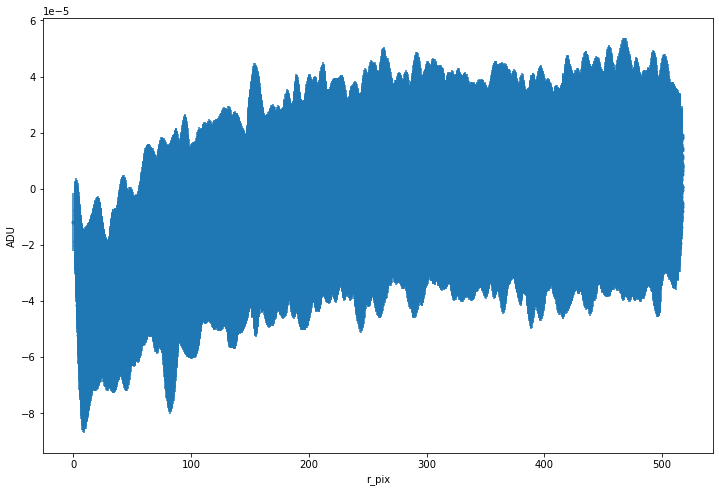

In [12]:
setup_plot((12,8), 'r_pix', 'ADU')
plt.errorbar(dati_arr2[7] , dati_arr2[10] , dati_arr2[11], fmt='.')

<ErrorbarContainer object of 3 artists>

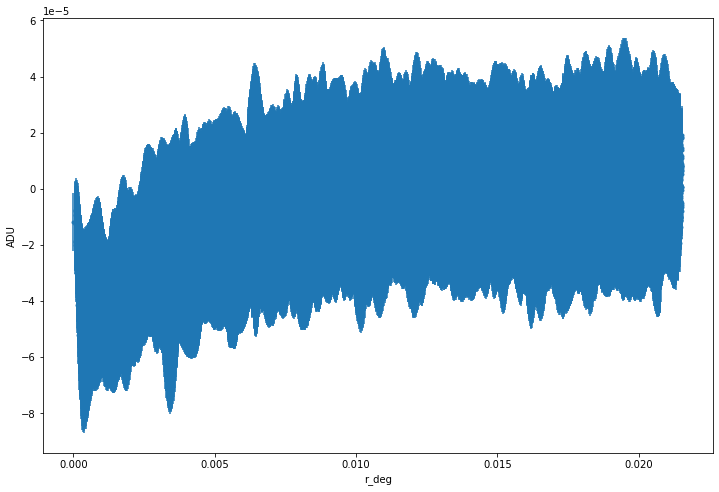

In [13]:
setup_plot((12,8), 'r_deg', 'ADU')
plt.errorbar(dati_arr2[8] , dati_arr2[10] , dati_arr2[11], fmt='.')

<ErrorbarContainer object of 3 artists>

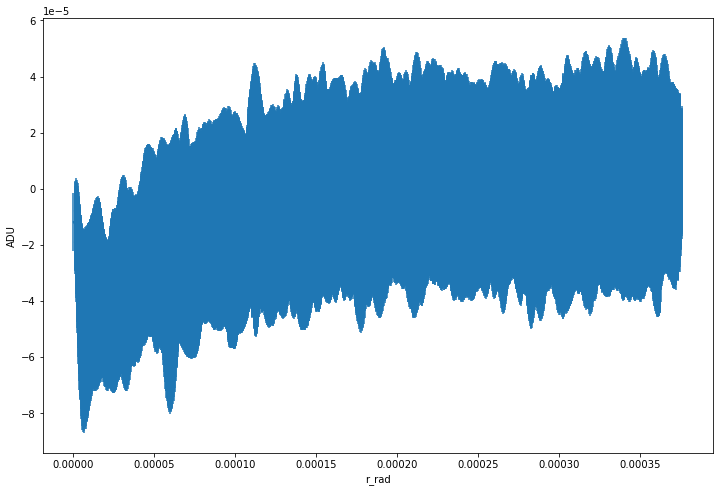

In [14]:
setup_plot((12,8), 'r_rad', 'ADU')
plt.errorbar(dati_arr2[9] , dati_arr2[10] , dati_arr2[11])

In [64]:
r=r_finder_new(dati_arr0, array_fil)
r=np.transpose(np.array(r))

def flux(theta, dati_0 , dati ,akkk):
    
    scale='pixel'
    beta , norm , r_0  = theta
   
    if scale=='pixel':

        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= norm*(10**(-6))*(1+(r[0][:]/r_0)**2)**(-beta*10**(-2))
    elif scale=='angle_deg':
        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= norm*(10**-6)*(1+(r[1][:]/r_0)**2)**(-beta*10**(-2))
    elif scale== 'angle_rad':
        fin_flux=np.zeros_like(dati_0[0])
        fin_flux[:]= norm*(10**-6)*(1+(r[2][:]/r_0)**2)**(-beta*10**(-2))
    return fin_flux

def log_prior(theta):
    beta , norm , r_0 = theta
    
    if 0.0 < norm < 10000.0 and -200.0 < beta < 200.0 and 5 < r_0 < 5000.0:
        res=0.0
    else:
        res=-np.inf
    return res

def log_likelihood(theta , dati_0 , dati , akkk):
    

    y=dati[10]
    err=dati[11]
    y_ex = flux(theta, dati_0 , dati , akkk)
    logl = np.sum(np.log(1./np.sqrt(2*np.pi**2)) -(y-y_ex)**2/(2.*err**2))
    return logl

def log_posterior(theta, dati_0 , dati,  akkk ):
    centre_1='centre_1'
    centre_2='centre_2'
    scale='pixel'
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    logl = log_likelihood(theta, dati_0,  dati, akkk)
    logpos = logl+lp
    if not np.isfinite(logpos):
        return -np.inf
    return logpos
import emcee

In [65]:

pos = [-100.0  , 50.0 , 100.0 ] + np.random.randn(16, 3)
pos=np.array(pos)
nwalkers , ndim = pos.shape
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(dati_arr0 , dati_arr2 , array_fil))
sampler3.run_mcmc(pos, 20000, progress=True);

100%|██████████| 20000/20000 [2:12:18<00:00,  2.52it/s]  


20000


AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [ 657.13098546  118.78135039 1049.99640604]

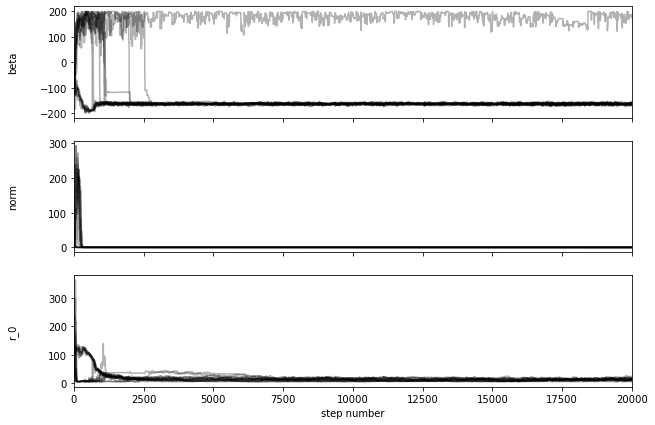

In [66]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples3 = sampler3.get_chain()
print(len(samples3))
labels3 = ["beta", "norm","r_0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples3[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples3))
    ax.set_ylabel(labels3[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

tau3 = sampler3.get_autocorr_time()
print(tau3)
flat_samples3 = sampler3.get_chain(discard=100, flat=True)
print(flat_samples3.shape)


GTC3 = pygtc.plotGTC(chains=flat_samples3,paramNames=labels3,figureSize=7,holdRC=True,
                    customLabelFont={'size':14},customTickFont={'size':14})

[[5.10000000e+02 5.10000000e+02 5.10000000e+02 ... 1.53800000e+03
  1.53800000e+03 1.53800000e+03]
 [1.00200000e+03 1.00300000e+03 1.00400000e+03 ... 1.04100000e+03
  1.04200000e+03 1.04300000e+03]
 [9.25668428e-06 7.31922910e-06 5.41111467e-06 ... 1.84322780e-05
  1.76167141e-05 1.63296900e-05]]
(3, 803859)


[[ 510  510  510 ... 1538 1538 1538]
 [1002 1003 1004 ... 1041 1042 1043]]
(2, 803859)


211409
208569
205735
202907
200085
197269
195396
192592
189795
187934
186077
183297
181448
179602
176840
175003
173170
171341
169516
167694
165876
164062
162253
160448
158647
156850
155057
154162
152376
150595
148818
147931
146162
144397
143516
141759
140882
139133
138260
136519
134782
133916
133051
131326
130465
128748
127892
127037
125332
124481
123632
121939
121094
120251
118570
117732
116895
116060
114395
113565
112736
111909
111084
109439
108619
107801
106985
106170
105357
104546
103737
102930
101321
100519
99719
98921
98125
97331
96539
95749
94961
94175
93391
92609
91829
91051
90275
89501
88729
87959
87960
87192
86427
85664
84903
84144
83387
82633
81881
81131
81132
80384
79639
78896
78156
77418
76682
76683
75949
75218
74490
73764
73765
73041
72320
71602
70886
70887
70173
69462
68754
68048
68049
67345
66645
65947
65948
65252
64560
63870
63871
63183
62499
61817
61818
61138
60462
60463
59789
59119
58451
58452
57786
57124
57125
56465
55809
55810
55156
54506
54507
53859
53215
53216
52